<h1 style='text-align:center;'>Loan Prediction - Will your loan application be accepted?</h1>

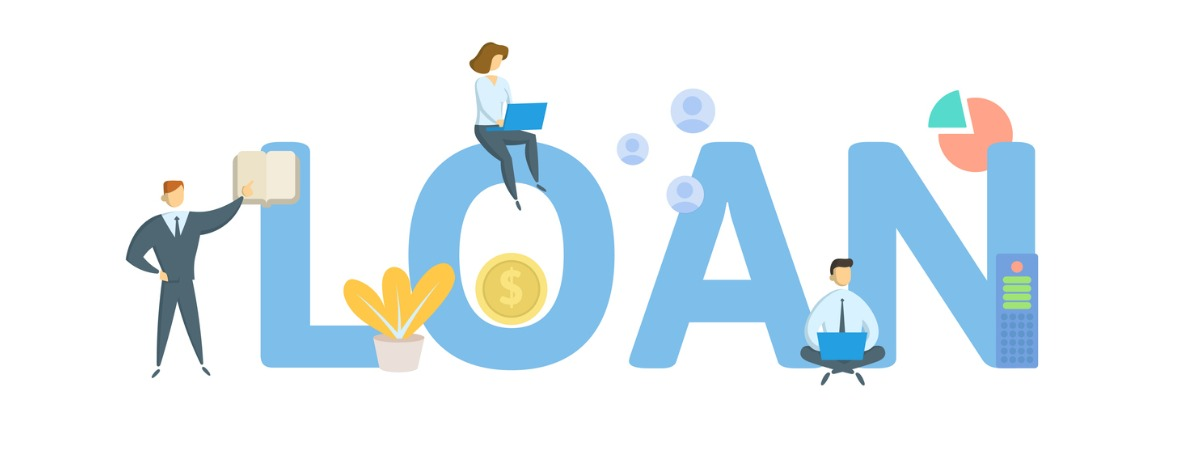

<h1><font style='color:#D52C19;' size=+2.5>T</font><font style='color:#FA6F14;' size=+2.5>a</font><font style='color:#08B4E4;' size=+2.5>b</font><font style='color:#73D8A6;' size=+2.5>l</font><font style='color:#FBBF44;' size=+2.5>e</font><font style='color:#D861BB;' size=+2.5> o</font><font style='color:#089371;' size=+2.5>f</font><font style='color:#0F33A3;' size=+2.5> C</font><font style='color:#D52C19;' size=+2.5>o</font><font style='color:#FA6F14;' size=+2.5>n</font><font style='color:#08B4E4;' size=+2.5>t</font><font style='color:#73D8A6;' size=+2.5>e</font><font style='color:#FBBF44;' size=+2.5>n</font><font style='color:#D861BB;' size=+2.5>t</font><font style='color:#089371;' size=+2.5>s</font></h1>
    
* [0. Introduction](#0)   
* [1. Import Modules](#1)
* [2. Data Load](#2)
* [3. Assessing Data](#3)
* [4. Exploratory Data Analysis (EDA)](#4)
    * [4.1 Data Distripution](#4.1)
    * [4.2 Finding Relationships](#4.2)
    * [4.3 Conclusions](#4.3)
* [5. Data Preprocessing](#5)
    * [5.1 Cleansing - Missing values](#5.1)
    * [5.2 Edit Types](#5.2)
    * [5.3 Encoding Data](#5.3)
    * [5.4 Feature Selection](#5.4)
    * [5.5 Split data to Train and Test Sets](#5.5)
    * [5.6 Feature Scaling](#5.6)
* [6. Modeling](#6)
    * [6.1 Model Training ](#6.1)
    * [6.2 Model Evaluation ](#6.2)
* [7. Deployment](#7)


<a id="0"></a>
<font color="#089371" size=+2.5><b>0. Introduction</b></font>

> Description 

- Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.


> What is our target ? 
 - Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form.These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers. 

<a id="1"></a>
<font color="#089371" size=+2.5><b>1. Import Modules</b></font>

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report
import joblib # Saving model for deployment 

# Showing Plots inside notebook
%matplotlib inline  
sns.set(rc={'figure.figsize': [7, 7]}, font_scale=1.2) # Standard figure size for all 

<a id="2"></a>
<font color="#089371" size=+2.5><b>2. Data Load</b></font>

In [2]:
# Reading Csv 
df = pd.read_csv("Data\\Loan data.csv")
df.sample(15)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
88,LP001289,Male,No,0,Graduate,No,8566,0.0,210.0,360.0,1.0,Urban,Y
19,LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
326,LP002068,Male,No,0,Graduate,No,4917,0.0,130.0,360.0,0.0,Rural,Y
21,LP001046,Male,Yes,1,Graduate,No,5955,5625.0,315.0,360.0,1.0,Urban,Y
540,LP002741,Female,Yes,1,Graduate,No,4608,2845.0,140.0,180.0,1.0,Semiurban,Y
403,LP002300,Female,No,0,Not Graduate,No,1963,0.0,53.0,360.0,1.0,Semiurban,Y
339,LP002114,Female,No,0,Graduate,No,4160,0.0,71.0,360.0,1.0,Semiurban,Y
108,LP001379,Male,Yes,2,Graduate,No,3800,3600.0,216.0,360.0,0.0,Urban,N
430,LP002377,Female,No,1,Graduate,Yes,8624,0.0,150.0,360.0,1.0,Semiurban,Y
248,LP001824,Male,Yes,1,Graduate,No,2882,1843.0,123.0,480.0,1.0,Semiurban,Y


<a id="3"></a>
<font color="#089371" size=+2.5><b>3. Assessing Data</b></font>

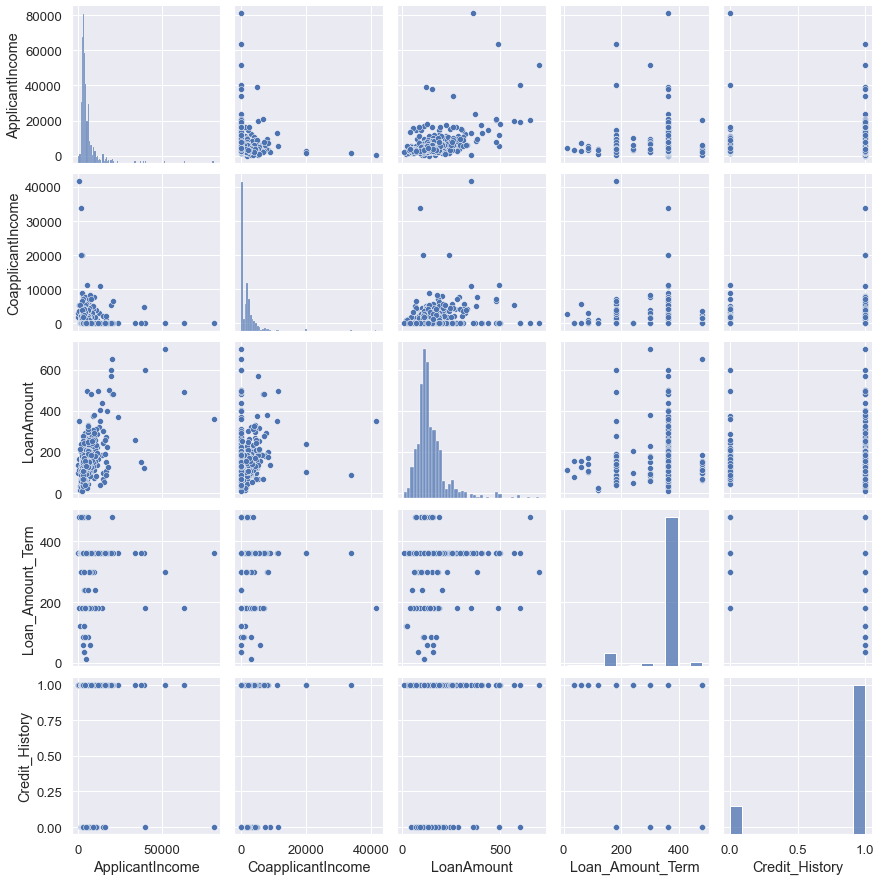

In [3]:
# Find some relations 
sns.pairplot(df);

In [4]:
# showing Statistics 
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.Married.value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [7]:
df.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [8]:
df.Loan_Amount_Term.value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [9]:
df['Loan_Amount_Term'].mean()

342.0

In [10]:
df.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [11]:
# Correlation matrix 
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


<a id="4"></a>
<font color="#089371" size=+2.5><b>5. Exploratory Data Analysis (EDA)</b></font>

<a id="4.1"></a>
<font color="#08B4E4" size=+1.5><b>4.1. Data Distripution</b></font>

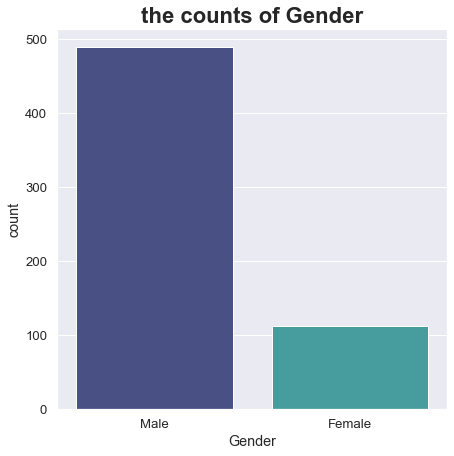

In [12]:
sns.countplot(x='Gender' , data=df ,palette='mako');
plt.title("the counts of Gender", {'weight' : 'bold','size': 22}); 

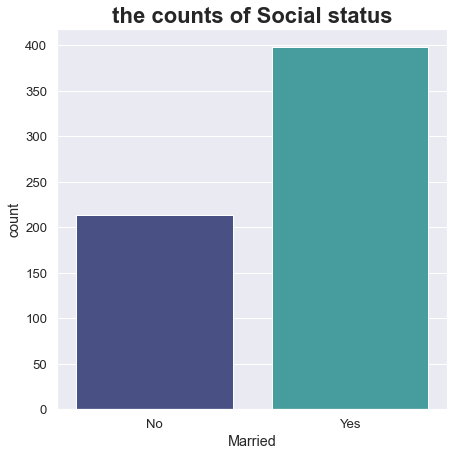

In [13]:
sns.countplot(x='Married' , data=df,palette='mako')
plt.title("the counts of Social status", {'weight' : 'bold','size': 22});

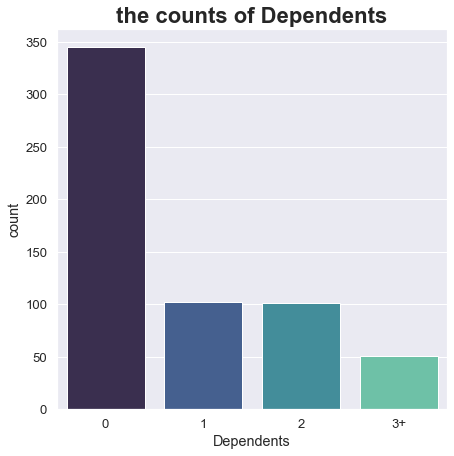

In [14]:
sns.countplot(x='Dependents' , data=df,palette='mako')
plt.title("the counts of Dependents", {'weight' : 'bold','size': 22});

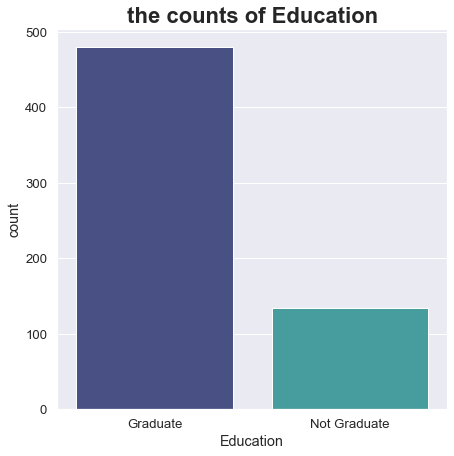

In [15]:
sns.countplot(x='Education' , data=df,palette='mako')
plt.title("the counts of Education", {'weight' : 'bold','size': 22});

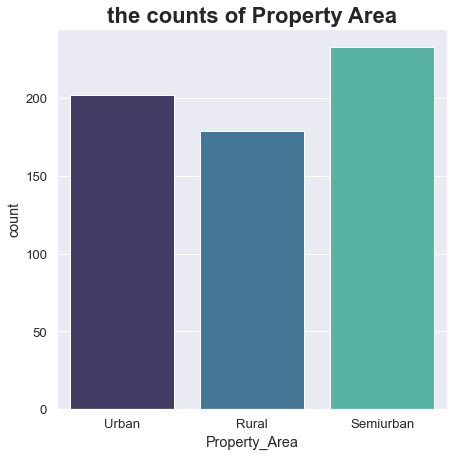

In [16]:
sns.countplot(x='Property_Area' , data=df,palette='mako')
plt.title("the counts of Property Area", {'weight' : 'bold','size': 22});

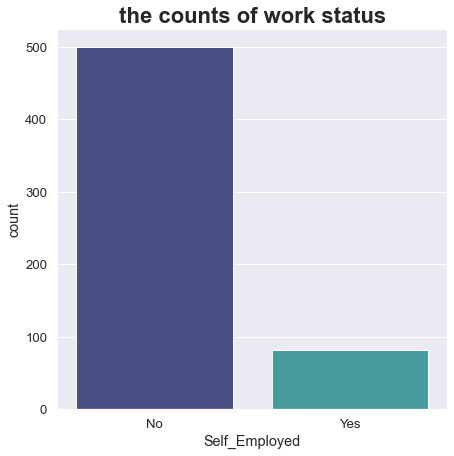

In [17]:
sns.countplot(x='Self_Employed' , data=df,palette='mako')
plt.title("the counts of work status", {'weight' : 'bold','size': 22});

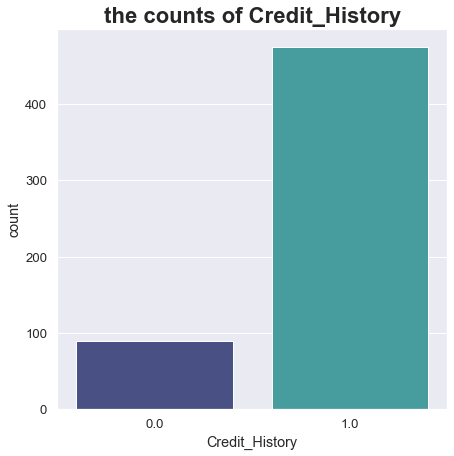

In [18]:
sns.countplot(x='Credit_History' , data=df,palette='mako')
plt.title("the counts of Credit_History", {'weight' : 'bold','size': 22});

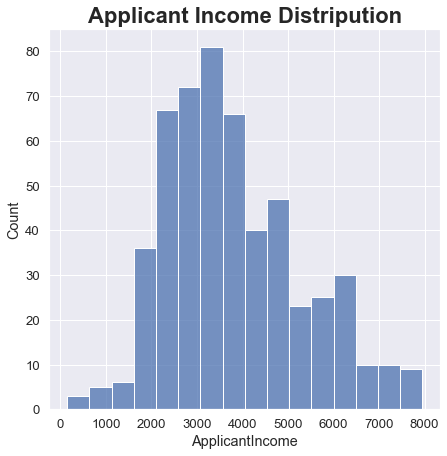

In [19]:
income = df[df['ApplicantIncome'] < 8000].ApplicantIncome # To Handle Outliers 
sns.histplot(x=income , data=df)
plt.title("Applicant Income Distripution", {'weight' : 'bold','size': 22});

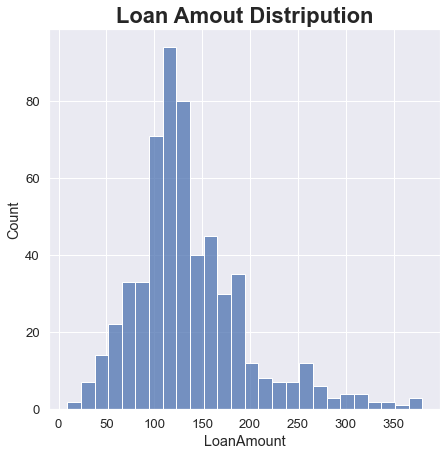

In [20]:
income = df[df['LoanAmount'] < 400].LoanAmount # To Handle Outliers 
sns.histplot(x=income , data=df)
plt.title("Loan Amout Distripution", {'weight' : 'bold','size': 22});

<a id="4.2"></a>
<font color="#08B4E4" size=+1.5><b>4.2. Finding Relationships</b></font>

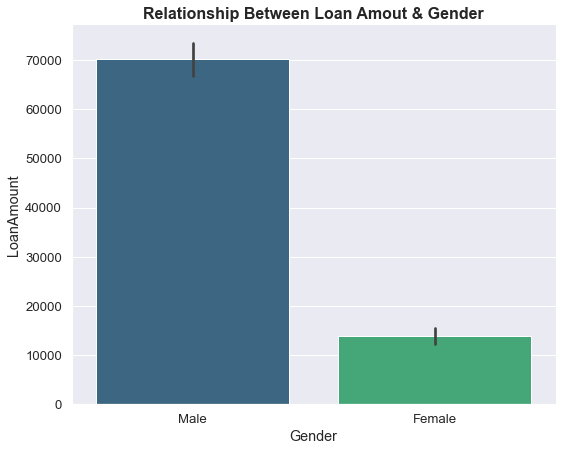

In [21]:
sns.catplot(x="Gender", y="LoanAmount", data=df, height=6, aspect=1.3, kind="bar",  estimator=np.sum ,palette='viridis');
plt.title("Relationship Between Loan Amout & Gender", {'weight' : 'bold','size': 16});

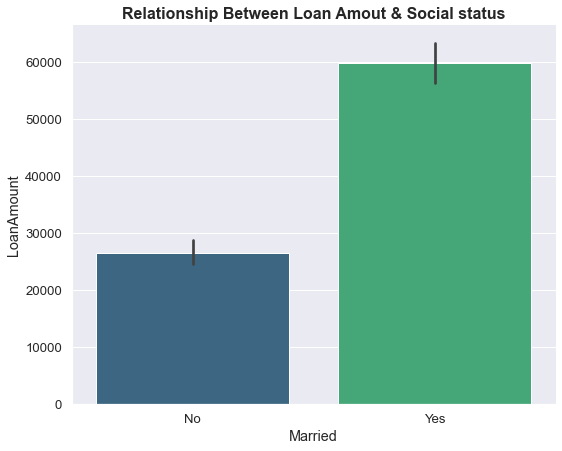

In [22]:
sns.catplot(x="Married", y="LoanAmount", data=df, height=6, aspect=1.3, kind="bar",  estimator=np.sum,palette='viridis');
plt.title("Relationship Between Loan Amout & Social status", {'weight' : 'bold','size': 16});

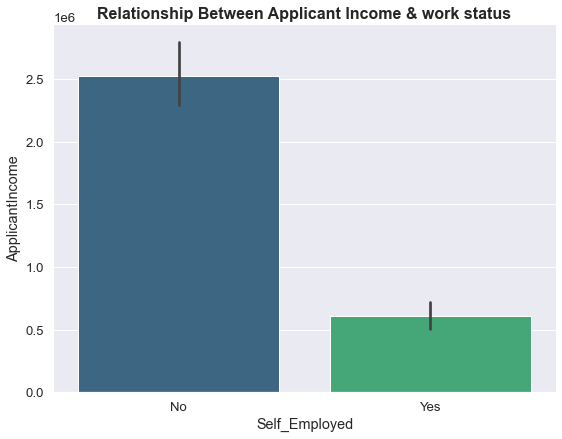

In [23]:
sns.catplot(x="Self_Employed", y="ApplicantIncome", data=df, height=6, aspect=1.3, kind="bar",  estimator=np.sum,palette='viridis');
plt.title("Relationship Between Applicant Income & work status", {'weight' : 'bold','size': 16});

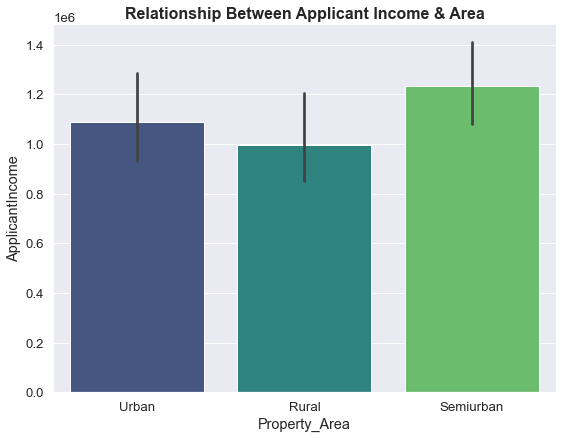

In [24]:
sns.catplot(x="Property_Area", y="ApplicantIncome", data=df, height=6, aspect=1.3, kind="bar",  estimator=np.sum,palette='viridis');
plt.title("Relationship Between Applicant Income & Area", {'weight' : 'bold','size': 16});

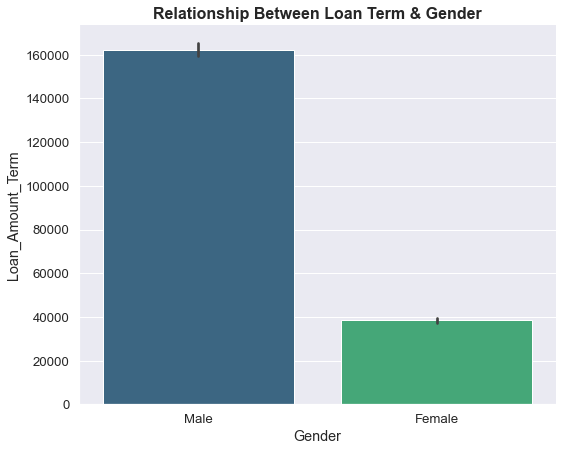

In [25]:
sns.catplot(x="Gender", y="Loan_Amount_Term", data=df, height=6, aspect=1.3, kind="bar",  estimator=np.sum,palette='viridis');
plt.title("Relationship Between Loan Term & Gender", {'weight' : 'bold','size': 16});

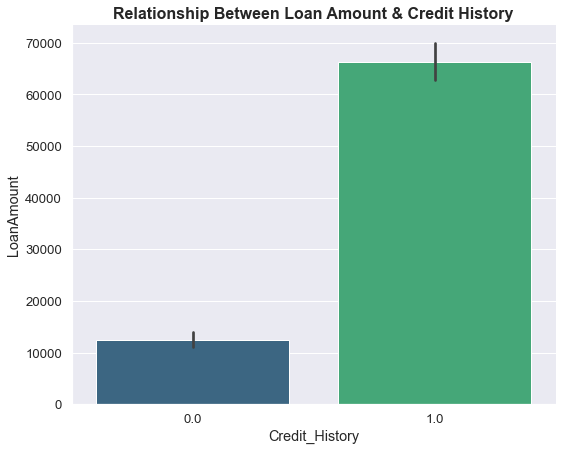

In [26]:
sns.catplot(x="Credit_History", y="LoanAmount", data=df, height=6, aspect=1.3, kind="bar",  estimator=np.sum,palette='viridis');
plt.title("Relationship Between Loan Amount & Credit History", {'weight' : 'bold','size': 16});

<a id="4.3"></a>
<font color="#08B4E4" size=+1.5><b>4.3. Conclusions</b></font>

> Important Distriputions Conclusions

- The number of male applicants for loan is more than three times the number of females.
- Most of the loan applicants are independent people and not self-employed.
- The number of non-graduate applicants is small compared to graduates.
- Most of the applicants' income range from 2000 - 5000 Dollars.
- The most requested loans range from 100 - 160 thousand Dollars.

> Important Relationships Conclusions

- Males request loans of high value, unlike females, not exceeding 20 thousand dollars
- Those with a credit history can apply for high-value loans
- Married people ask for high value loans more than unmarried people

<a id="5"></a>
<font color="#089371" size=+2.5><b>5. Data Preprocessing</b></font>

<a id="5.1"></a>
<font color="#08B4E4" size=+1.5><b>5.1. Cleansing - Missing values</b></font>

In [27]:
columns = ['Gender','Married','Dependents','Self_Employed','Credit_History']
for i in columns : 
    mode = df[i].mode().values[0] 
    df[i] = df[i].replace({ np.nan : mode })

In [28]:
# Dependents column
mean = df['Loan_Amount_Term'].mean()
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].replace({ np.nan : mean })

In [29]:
df.drop(list(df.query('LoanAmount == "NaN" ').index) , inplace=True)

<a id="5.2"></a>
<font color="#08B4E4" size=+1.5><b>5.2. Edit Types</b></font>

In [30]:
df['Credit_History'] = df['Credit_History'].astype("string")

In [31]:
df = df.convert_dtypes()

In [32]:
df["Loan_Amount_Term"] = df["Loan_Amount_Term"]/12

<a id="5.3"></a>
<font color="#08B4E4" size=+1.5><b>5.3. Encoding Data</b></font>

In [33]:
df = pd.get_dummies(df,columns=['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area','Loan_Status'],drop_first=True)

In [34]:
df

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Credit_History_1.0,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
1,LP001003,4583,1508.0,128,30.0,1,1,1,0,0,0,0,1,0,0,0
2,LP001005,3000,0.0,66,30.0,1,1,0,0,0,0,1,1,0,1,1
3,LP001006,2583,2358.0,120,30.0,1,1,0,0,0,1,0,1,0,1,1
4,LP001008,6000,0.0,141,30.0,1,0,0,0,0,0,0,1,0,1,1
5,LP001011,5417,4196.0,267,30.0,1,1,0,1,0,0,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,2900,0.0,71,30.0,0,0,0,0,0,0,0,1,0,0,1
610,LP002979,4106,0.0,40,15.0,1,1,0,0,1,0,0,1,0,0,1
611,LP002983,8072,240.0,253,30.0,1,1,1,0,0,0,0,1,0,1,1
612,LP002984,7583,0.0,187,30.0,1,1,0,1,0,0,0,1,0,1,1


<a id="5.4"></a>
<font color="#08B4E4" size=+1.5><b>5.4. Feature Selection</b></font>

In [35]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

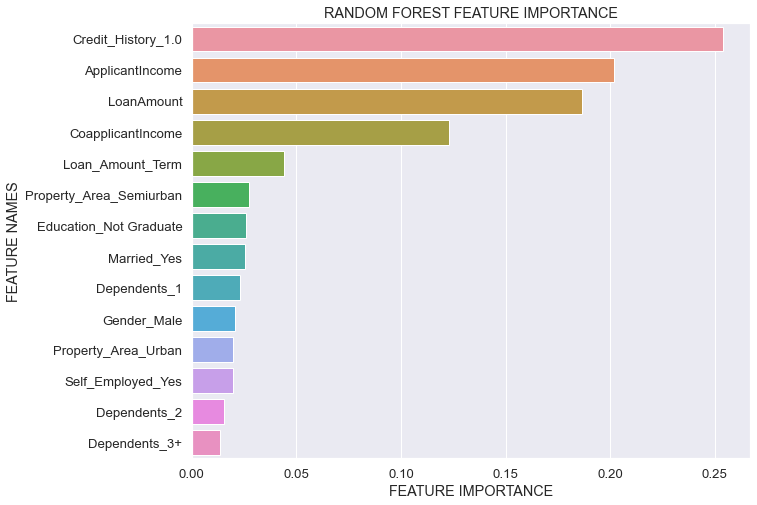

In [36]:
X = df.iloc[:,1:15]
Y = df['Loan_Status_Y']
rand_f = RandomForestClassifier().fit(X, Y)

plot_feature_importance(rand_f.feature_importances_, X.columns, 'RANDOM FOREST')

> Top 5 features : 
- Credit history 
- Applicant income
- Co-Applicant income
- Loan amount 
- Loan amount_term 

<a id="5.5"></a>
<font color="#08B4E4" size=+1.5><b>5.5. Split data to Train and Test Sets</b></font>

In [37]:
x = df[['Credit_History_1.0','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Gender_Male']]
y = df['Loan_Status_Y']

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=90)

<a id="5.6"></a>
<font color="#08B4E4" size=+1.5><b>5.6. Feature Scaling</b></font>

In [39]:
scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [40]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

<a id="6"></a>
<font color="#089371" size=+2.5><b>6. Modeling</b></font>

<a id="6.1"></a>
<font color="#08B4E4" size=+1.5><b>6.1.Model Training</b></font>

In [41]:
model =  RandomForestClassifier(n_estimators=60)

In [42]:
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=60)

<a id="6.2"></a>
<font color="#08B4E4" size=+1.5><b>6.2. Model Evaluation</b></font>


In [43]:
y_pred = model.predict(x_test)

In [55]:
print(f'Model Accuracy: {(model.score(x_train, y_train))*100}%')

Model Accuracy: 100.0%


In [45]:
print(f'Testing Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')

Testing Confusion Matrix: 
[[12 19]
 [ 4 84]]


In [54]:
print(f'Testing Recall: {round(recall_score(y_test, y_pred)*100,2)}%')    

Testing Recall: 95.45%


In [57]:
print(f'Testing F-1: {round(f1_score(y_test, y_pred)*100,2)}%')

Testing F-1: 87.96%


<a id="7"></a>
<font color="#089371" size=+2.5><b>7. Deployment</b></font>

In [50]:
# Saving model 
joblib.dump(model, 'model.h5')

['model.h5']

In [51]:
# Saving Scalar 
joblib.dump(scaler, 'scaler.h5')

['scaler.h5']

In [ ]:
# Storing variables
custom_data = []
for inp in x.columns:
    print(f'{inp}: ')
    val = float(input())
    custom_data.append(val)

data = []
for v in custom_data:
    data.append(float(v))

In [ ]:
# Predict 
model.predict(scaler.transform([data]))

<h1 style='text-align:center;'>Mission Succeeded</h1>